# Line Tracing #

## Idea ##

Function: Main
1) Load 1 pixel Image
2) Give every pixel a id
3) Select a Starting Point
Function: Trace Line
1) Check all Pixels surrounding the Starting Point

In [73]:
import utils
import classes
import matplotlib.pyplot as plt
import networkx as nx

In [74]:
imageArray = utils.load1BitBWImage("./../src/testImages/","thin.png")
colorImage = utils.loadRGBImage("./../src/testImages/","thin.png")

startingPoint = [72,52]
pixelBefore=None

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


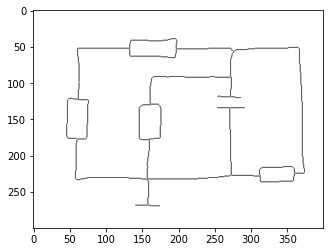

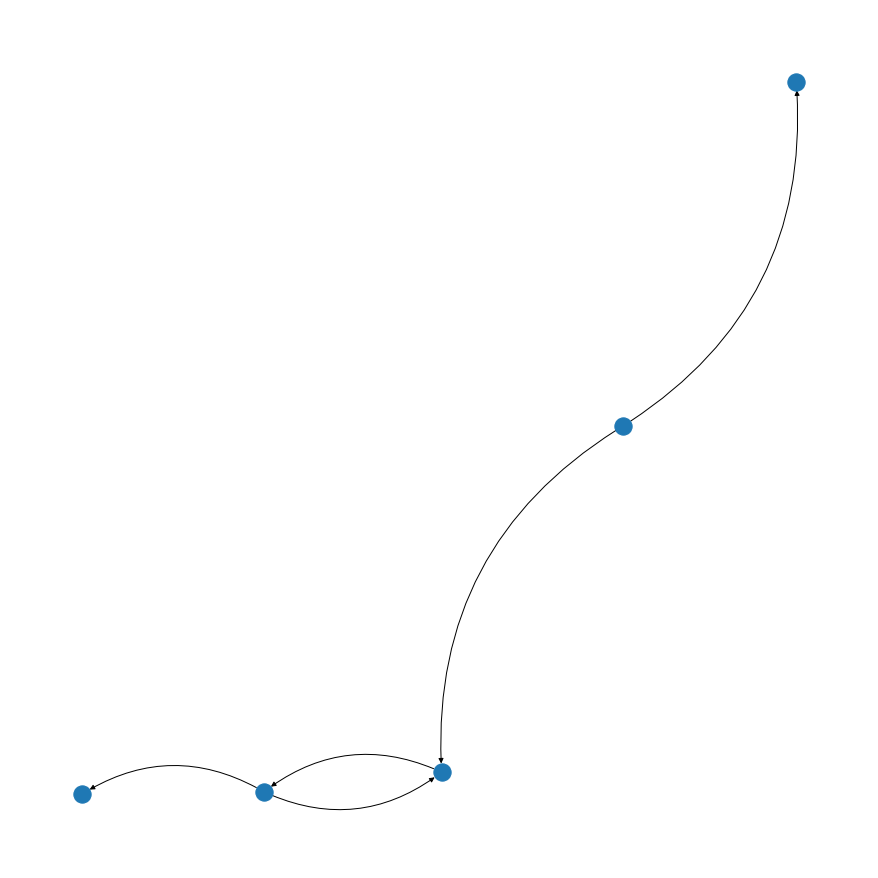

In [75]:
besucht = []
G = nx.MultiDiGraph()
G.add_node("start")

def traceLine(image, currentPixel, pixelBefore,lastEdgePoint, start = False):
    global besucht,colorImage,G

    
    #start by checking if the current pixel was already visited
    #exit if it has
    if currentPixel in besucht:
        colorImage[currentPixel[1]][currentPixel[0]] = (0,255,0,255)
        if str(currentPixel) in G:
            G.add_edge(lastEdgePoint,str(currentPixel))
        
        return
    besucht.append(currentPixel)


    #Recursive part
    neighbourPixels = [[-1,-1],[0,-1],[1,-1], \
                       [-1,0],        [1,0],  \
                       [-1,1], [0,1], [1,1]]

    validNeighbours=[]
    for neib in neighbourPixels:
        neighbourPixel = [currentPixel[0]+neib[0],currentPixel[1]+neib[1]]
        if image[neighbourPixel[1]][neighbourPixel[0]] == 1:
            if not neighbourPixel == pixelBefore:
                validNeighbours.append(neighbourPixel)

    if len(validNeighbours) > 1 and not start:
        colorImage[currentPixel[1]][currentPixel[0]] = (0,0,255,255)
        G.add_node(str(currentPixel))
        G.add_edge(lastEdgePoint,str(currentPixel))
        for validNeigbour in validNeighbours:
            traceLine(image,validNeigbour,currentPixel,str(currentPixel))
    elif len(validNeighbours) == 0 and not start:
        colorImage[currentPixel[1]][currentPixel[0]] = (255,0,0,255)
        G.add_node(str(currentPixel),lenght=1)
        G.add_edge(lastEdgePoint,str(currentPixel))
    else:
        for validNeigbour in validNeighbours:
            traceLine(image,validNeigbour,currentPixel,lastEdgePoint)


traceLine(imageArray,startingPoint,pixelBefore,"start",True)
plt.imshow(colorImage, interpolation='bilinear')



#G.add_nodes_from([2, 3])
#G.add_edge(2, 3)

subax1 = plt.figure(121,figsize=(12,12))
nx.draw(G, with_labels=False,connectionstyle='arc3, rad = 0.3')